# Formative Assessment

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [1]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE # import the package
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from pandas.plotting import scatter_matrix
# from six import StringIO# Install sic if needed, or use # from sklearn.externals.six import StringIO 
# from IPython.display import Image  
# import pydotplus
# import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.cluster import KMeans
from numpy import arange
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
%matplotlib inline

### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

First, exploring the data

In [3]:
data = pd.read_csv('AirQualityUCI.csv', sep=',', names=['Date (DD/MM/YYYY)',
                                                        'Time (HH.MM.SS)',
                                                        'CO concentration (mg/m^3)',
                                                        'PT08.S1 (tin oxide)',
                                                        'Non Metanic HydroCarbons concentration (microg/m^3)',
                                                        'Benzene concentration (microg/m^3)',
                                                        'PT08.S2 (titania)',
                                                        'NOx concentration in ppb',
                                                        'PT08.S3 (tungsten oxide)',
                                                        'NO2 concentration (microg/m^3)', 
                                                        'PT08.S4 (tungsten oxide)', 
                                                        'PT08.S5 (indium oxide)',
                                                        'Temperature in °C',
                                                        'Absolute Humidity (%)',])

In [4]:
data.head()

,Date (DD/MM/YYYY),Time (HH.MM.SS),CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
1,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
2,10/03/2004,19.00.00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
3,10/03/2004,20.00.00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,0.7502
4,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,0.7867


In [5]:
data.shape

(9358, 14)

In [6]:
data.describe()

,Date (DD/MM/YYYY),Time (HH.MM.SS),CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
count,9358,9358,9358,9358,9358,9358,9358,9358,9358,9358,9358,9358,9358,9358
unique,392,25,98,1043,431,409,1247,927,1223,285,1605,1745,438,6685
top,12/04/2004,00.00.00,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
freq,24,390,1683,366,8443,366,366,1639,366,1642,366,366,366,366


In [7]:
data_clean=data.drop([0]) # removes first row that stated columns
data_clean

,Date (DD/MM/YYYY),Time (HH.MM.SS),CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
1,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
2,10/03/2004,19.00.00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
3,10/03/2004,20.00.00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,0.7502
4,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,0.7867
5,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,0.7568
9354,04/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,0.7119
9355,04/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,0.6406
9356,04/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,0.5139


In [8]:
data_clean.describe()

,Date (DD/MM/YYYY),Time (HH.MM.SS),CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
count,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357
unique,391,24,97,1042,430,408,1246,926,1222,284,1604,1744,437,6684
top,12/04/2004,00.00.00,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
freq,24,390,1683,366,8443,366,366,1639,366,1642,366,366,366,366


In [9]:
data_dateless=data_clean.drop(['Date (DD/MM/YYYY)','Time (HH.MM.SS)'], axis=1) # removes date & time which can't be converted to floats
data_dateless

,CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
2,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
3,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9353,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,0.7568
9354,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,0.7119
9355,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,0.6406
9356,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,0.5139


In [10]:
data_float=data_dateless.astype(float) # transforms remaining data to floats
data_float

,CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
1,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
2,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
3,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
4,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
5,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9353,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,0.7568
9354,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,0.7119
9355,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,0.6406
9356,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,0.5139


In [11]:
data_float.shape

(9357, 12)

In [12]:
data_float.describe()

,CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,2.231000


In [13]:
data_number = data_float.dropna(axis =0 , how ='any') #removes rows that are not a number,confirms only numbers left
data_number.shape

(9357, 12)

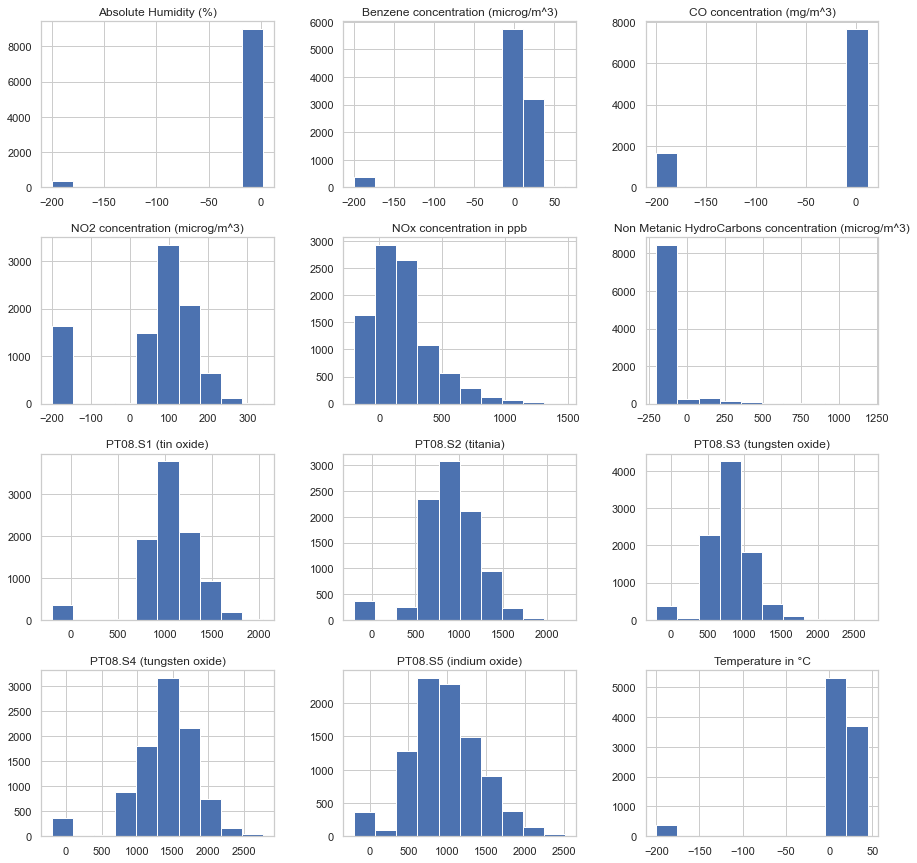

In [14]:
pd.DataFrame.hist(data_float, figsize = [15,15]); # see histogram summary

In [15]:
data_float.replace(-200.0, data_float.median(), inplace=True) # replace missing numbers with medians

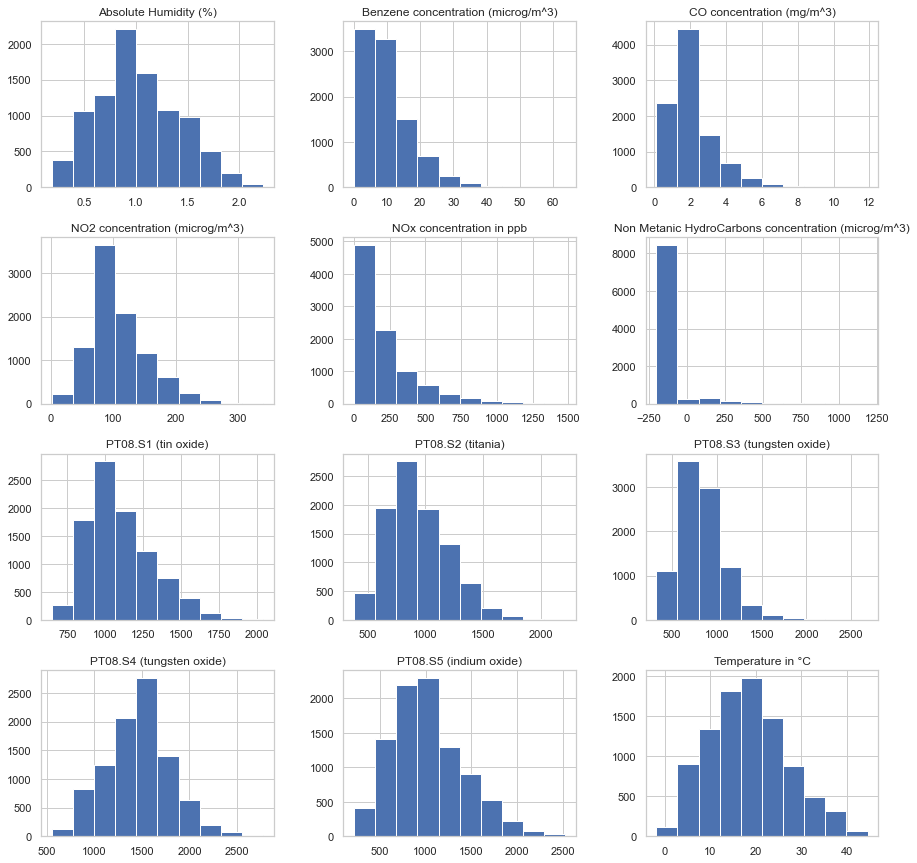

In [16]:
pd.DataFrame.hist(data_float, figsize = [15,15]);

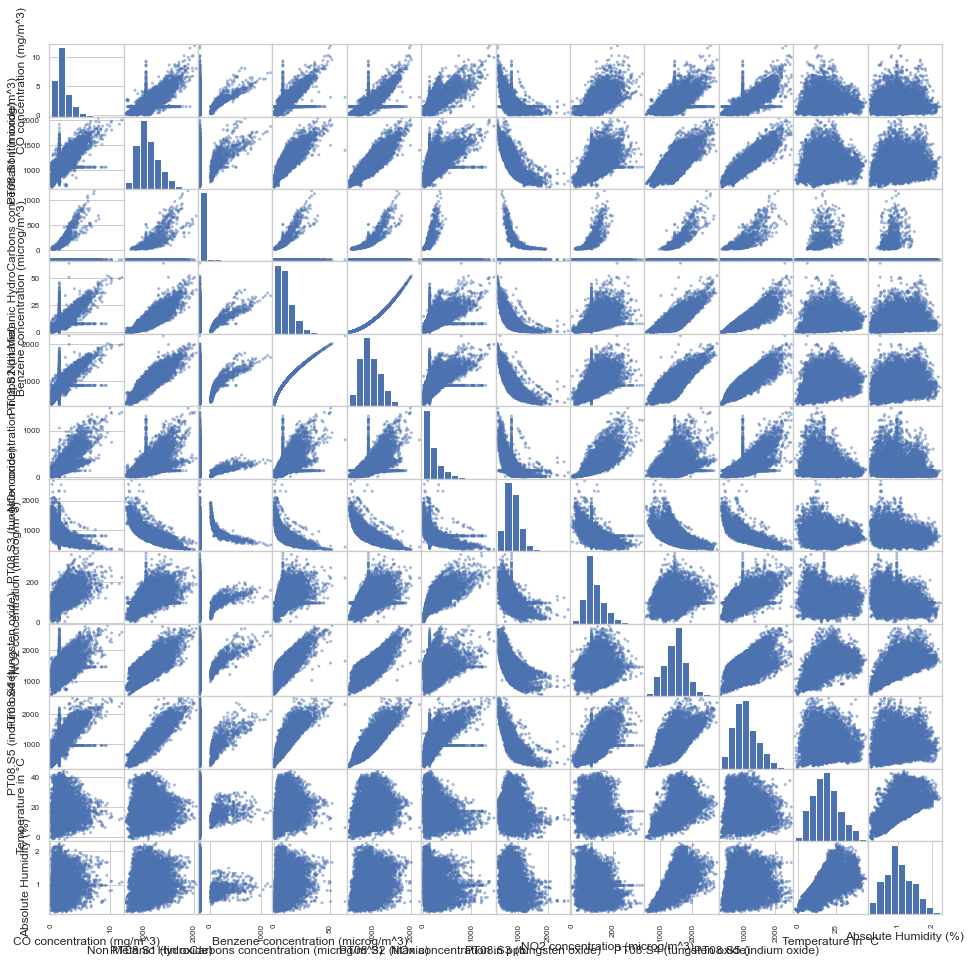

In [17]:
scatter_matrix(data_float, figsize=(16,16));

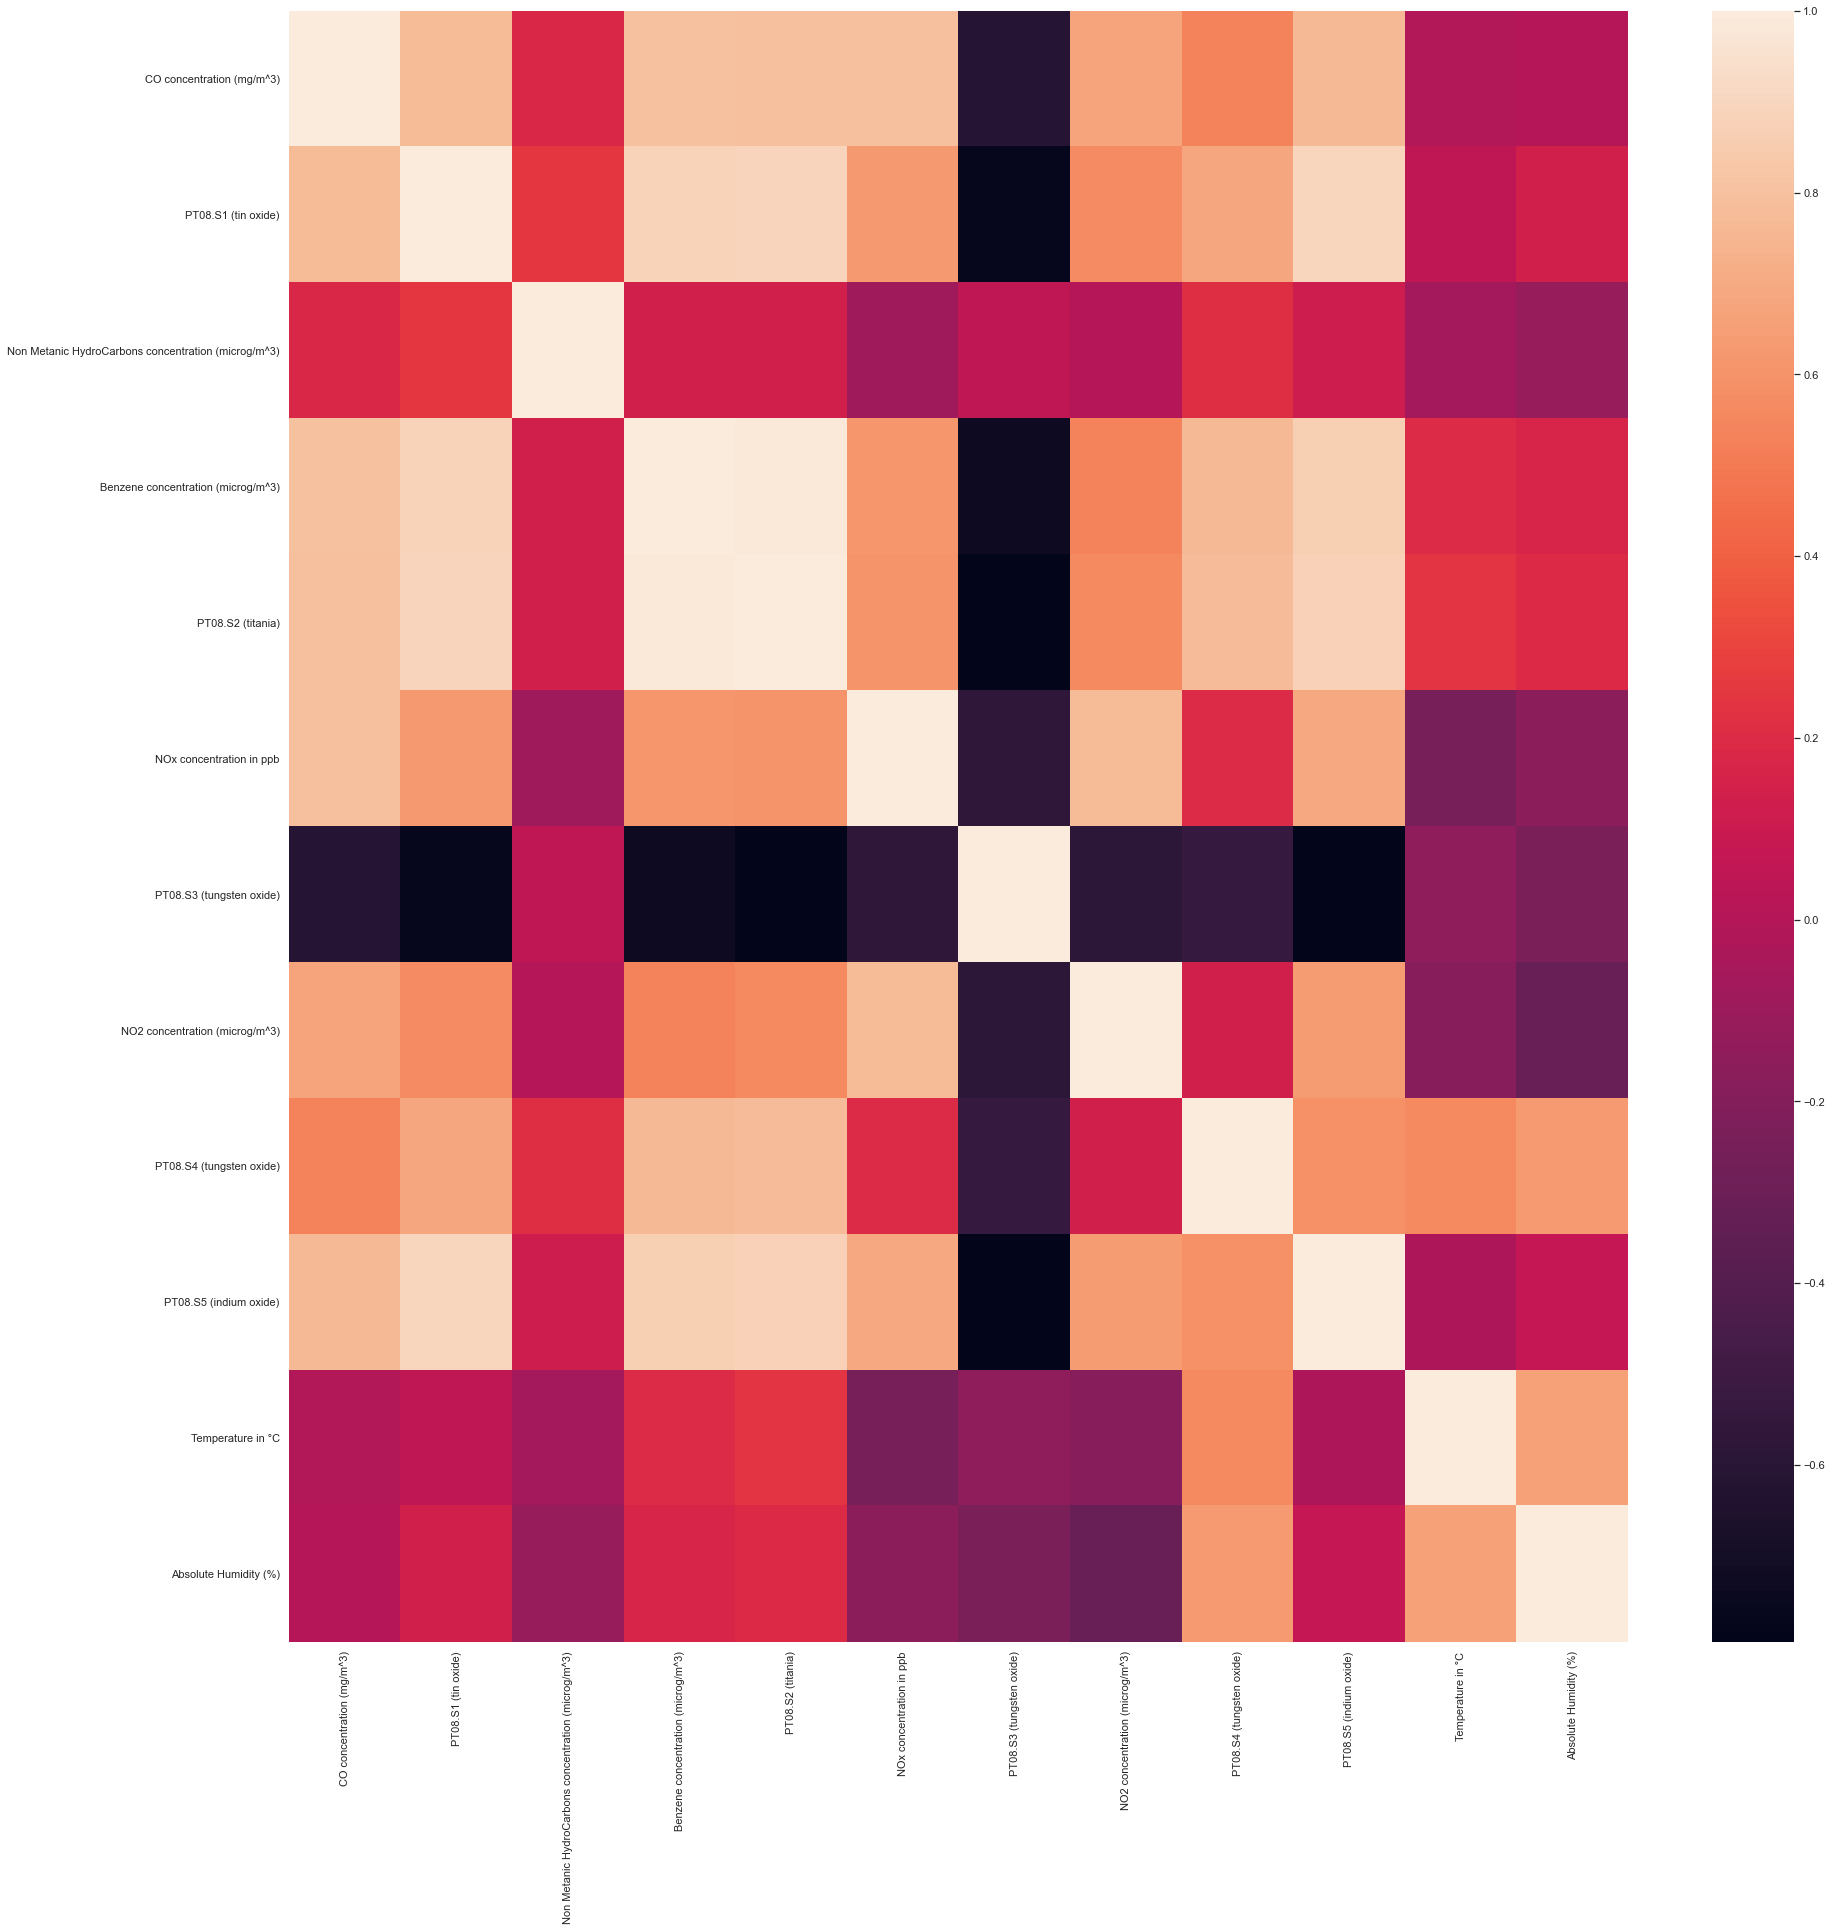

In [18]:
corr = data_float.corr() #Id correlated variables
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

In [19]:
# X = data_float['PT08.S1 (tin oxide)',
#                'PT08.S2 (titania)',
#                'PT08.S3 (tungsten oxide)',
#                'PT08.S4 (tungsten oxide)', 
#                'PT08.S5 (indium oxide)',
#                'Temperature in °C',
#                'Absolute Humidity (%)'
#                 ].values
# Y = data_float['CO concentration (mg/m^3)',
#                'Non Metanic HydroCarbons concentration (microg/m^3)',
#                'Benzene concentration (microg/m^3)',
#                'NOx concentration in ppb',
#                'NO2 concentration (microg/m^3)',].values

In [20]:
data_float

,CO concentration (mg/m^3),PT08.S1 (tin oxide),Non Metanic HydroCarbons concentration (microg/m^3),Benzene concentration (microg/m^3),PT08.S2 (titania),NOx concentration in ppb,PT08.S3 (tungsten oxide),NO2 concentration (microg/m^3),PT08.S4 (tungsten oxide),PT08.S5 (indium oxide),Temperature in °C,Absolute Humidity (%)
1,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
2,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
3,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
4,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
5,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9353,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,0.7568
9354,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,0.7119
9355,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,0.6406
9356,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,0.5139


In [21]:
array = data_float.values # get data values

In [22]:
X = array[:,(1,4,6,8,9,10,11)] # split data into input features (independent variables)
X

array([[1.360e+03, 1.046e+03, 1.056e+03, ..., 1.268e+03, 1.360e+01,
        7.578e-01],
       [1.292e+03, 9.550e+02, 1.174e+03, ..., 9.720e+02, 1.330e+01,
        7.255e-01],
       [1.402e+03, 9.390e+02, 1.140e+03, ..., 1.074e+03, 1.190e+01,
        7.502e-01],
       ...,
       [1.142e+03, 1.063e+03, 6.030e+02, ..., 1.092e+03, 2.690e+01,
        6.406e-01],
       [1.003e+03, 9.610e+02, 7.020e+02, ..., 7.700e+02, 2.830e+01,
        5.139e-01],
       [1.071e+03, 1.047e+03, 6.540e+02, ..., 8.160e+02, 2.850e+01,
        5.028e-01]])

In [23]:
Y = array[:,(0,2,3,5,7)] # this is the prediction feature
Y

array([[   2.6,  150. ,   11.9,  166. ,  113. ],
       [   2. ,  112. ,    9.4,  103. ,   92. ],
       [   2.2,   88. ,    9. ,  131. ,  114. ],
       ...,
       [   2.4, -200. ,   12.4,  293. ,  175. ],
       [   2.1, -200. ,    9.5,  235. ,  156. ],
       [   2.2, -200. ,   11.9,  265. ,  168. ]])

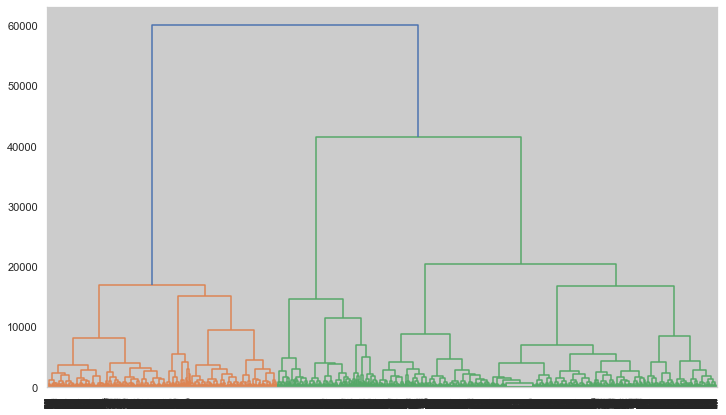

In [24]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendrogram = sch.dendrogram(Z)
plt.show()

#### What is the optimal number of clusters?

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

Text(0.5, 1.0, 'Elbow Curve')

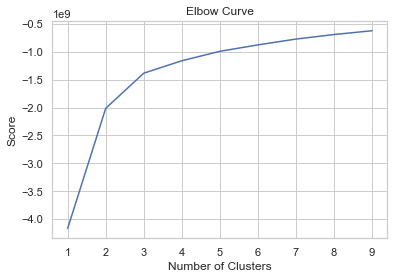

In [30]:
n_clusters = range(1, 10) # range for number of clusters

kmeans = [KMeans(n_clusters=i) for i in n_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(n_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
# The score values start to increase slowly after 5 clusters. Set $k = 3$.

In [31]:
#Fit the Model
# Now cluster the data. Create a clustering data type with number of clusters
k_means = KMeans(n_clusters=3,   # the number of clusters
             random_state=3) # set seed to get same results as your colleague

In [33]:
output = k_means.fit(X) # fit the model

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [28]:
y = hc.fit_predict(X)

In [34]:
print(metrics.silhouette_score(X, y))

0.3338847989495429


Determine the labes of the clustering model.

In [44]:
labels = k_means.predict(X)

### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

In [45]:
colors = {0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y',
          4 : 'c'} # map integer label to color
label_color = [colors[l] for l in labels]

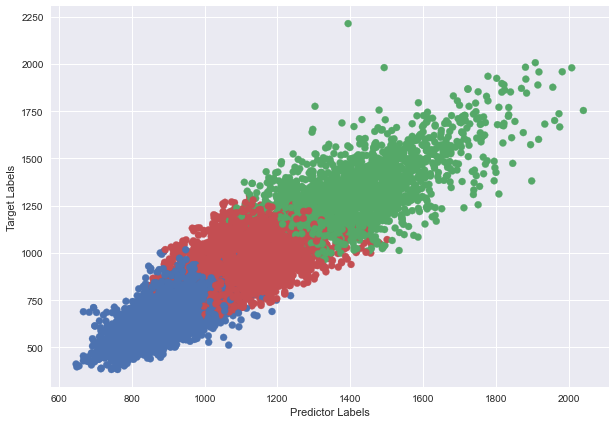

In [47]:
plt.figure('k-Means', figsize=(10,7))
plt.xlabel('Predictor Labels')
plt.ylabel('Target Labels')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=label_color, cmap=cmap)

### Performance

In [41]:
from sklearn import metrics

0.2368849706528177


### Interpretation

### More clusters

Do more clusters mean anything?

Begin with 5 clusters.

In [36]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.22385166384460123


In [40]:
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.2368849706528177


In [37]:
hc = AgglomerativeClustering(n_clusters=7, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.25606129936240135


In [38]:
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.2606716045863469


For 10 clusters.

In [39]:
hc = AgglomerativeClustering(n_clusters=10, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.24179110758136205


Prove a interpretation for the performance variation when the number of clusters are increased.

In [ ]:
#All high clusters give lower scores than 3 clusters

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)